In [1]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt  # Install required libraries


Cloning into 'yolov5'...
remote: Enumerating objects: 17270, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 17270 (delta 0), reused 0 (delta 0), pack-reused 17269 (from 2)
Receiving objects: 100% (17270/17270), 16.12 MiB | 23.27 MiB/s, done.
Resolving deltas: 100% (11858/11858), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# Step 2: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
import os

dataset_path = "/content/drive/MyDrive/catdogdataset"

# Check if train folder exists
print("Train folder exists:", os.path.exists(os.path.join(dataset_path, "train/images")))

# List a few files
train_images = os.listdir(os.path.join(dataset_path, "train/images"))
print("Sample training images:", train_images[:5])


Mounted at /content/drive
Train folder exists: True
Sample training images: ['american_bulldog_129_jpg.rf.937549a115dedfe4b56329a10cc6d303.jpg', 'american_bulldog_139_jpg.rf.1b6e5476580ae1bcd885d9c75db4c374.jpg', 'american_bulldog_131_jpg.rf.eb7d3d358fa884643b6423384915e0c0.jpg', 'american_bulldog_147_jpg.rf.6c922b28a2c83b3c4f2b099b68c18b4b.jpg', 'american_bulldog_16_jpg.rf.46514b6b78605de98942fba15705dfa6.jpg']


In [3]:
# Train YOLOv5 with Custom Dataset
!python train.py --img 640 --batch 16 --epochs 50 --data $dataset_path/data.yaml --weights yolov5s.pt --cache


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-02-16 02:02:29.864127: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739671350.168885    4288 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739671350.243755    4288 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

In [4]:
!mkdir -p /content/drive/MyDrive/catdogdataset/yolo_models

# Copy the best model to Google Drive
!cp runs/train/exp/weights/best.pt /content/drive/MyDrive/catdogdataset/yolo_models/
!cp runs/train/exp/weights/last.pt /content/drive/MyDrive/catdogdataset/yolo_models/

print("Model saved to Google Drive successfully!")

Model saved to Google Drive successfully!


In [6]:
# Evaluate the Model on the Validation Set
!python val.py --weights runs/train/exp/weights/best.pt --data /content/drive/MyDrive/catdogdataset/data.yaml --img 640 --save-txt


val: data=/content/drive/MyDrive/catdogdataset/data.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-398-g5cdad892 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/MyDrive/catdogdataset/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100% 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:01<00:00,  1.15s/it]
                   all         10         10      0.958          1      0.995      0.721
                   cat         10          6      0.919          1      0.995      

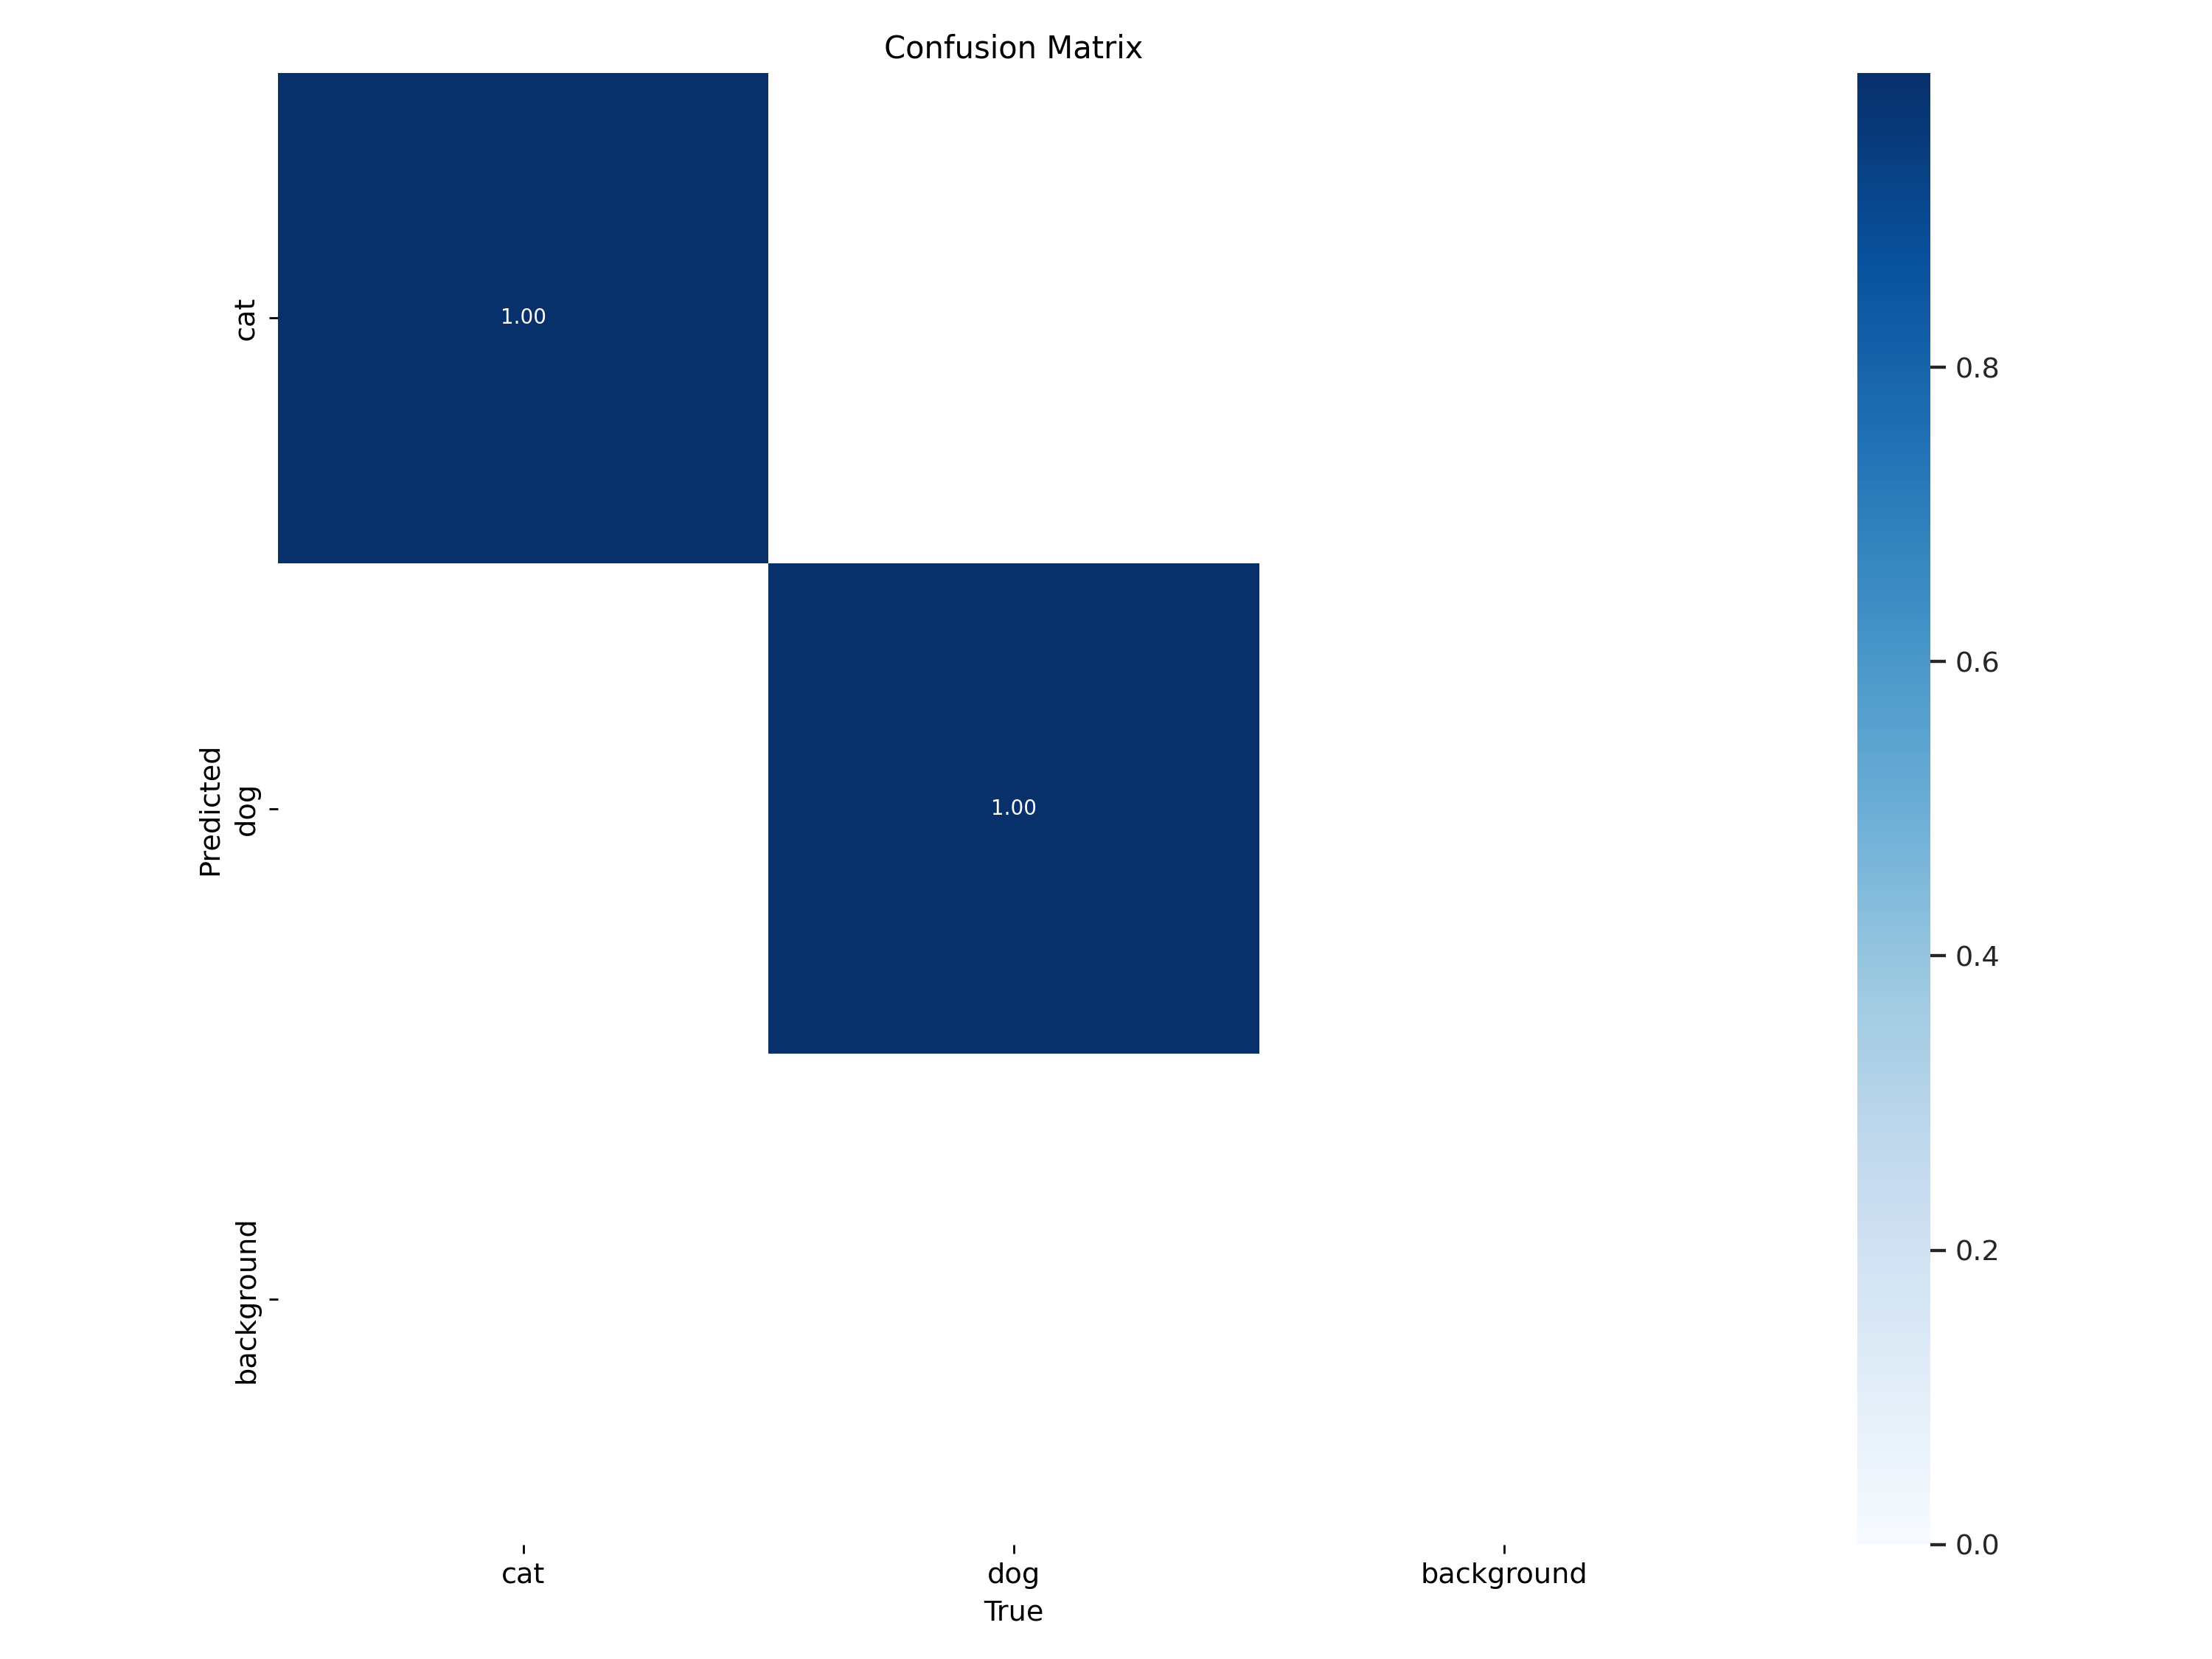

In [7]:
from IPython.display import Image
Image(filename='runs/val/exp/confusion_matrix.png', width=600)


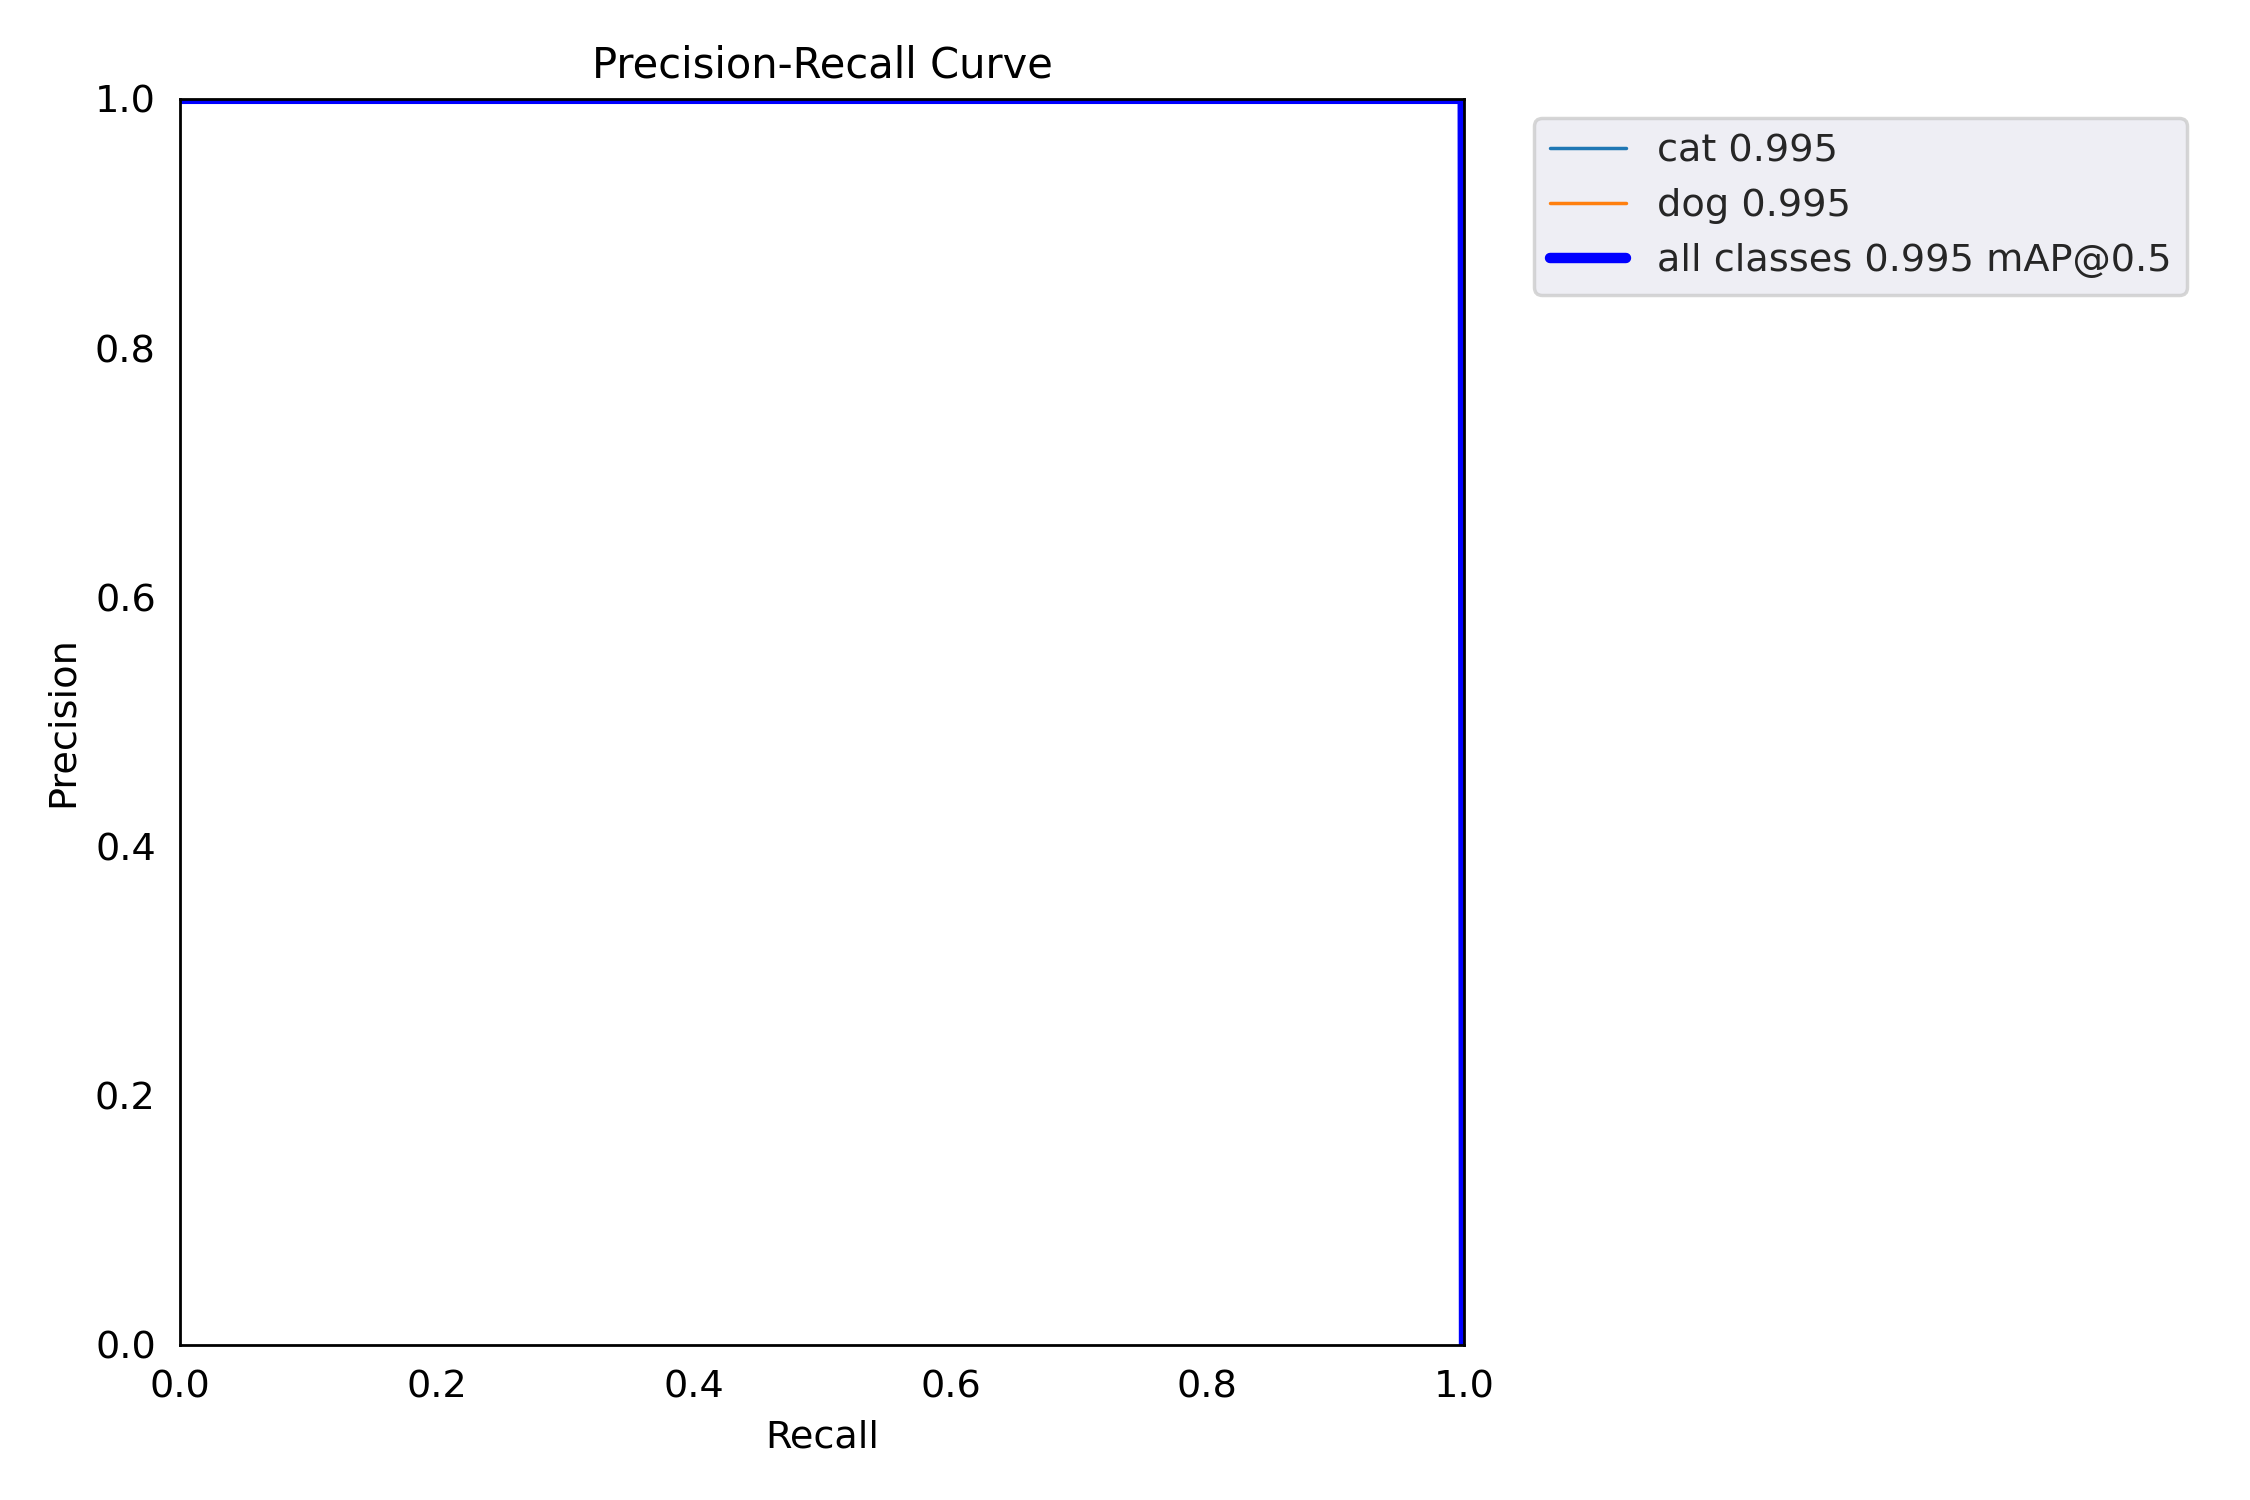

In [8]:
Image(filename='runs/val/exp/PR_curve.png', width=600)


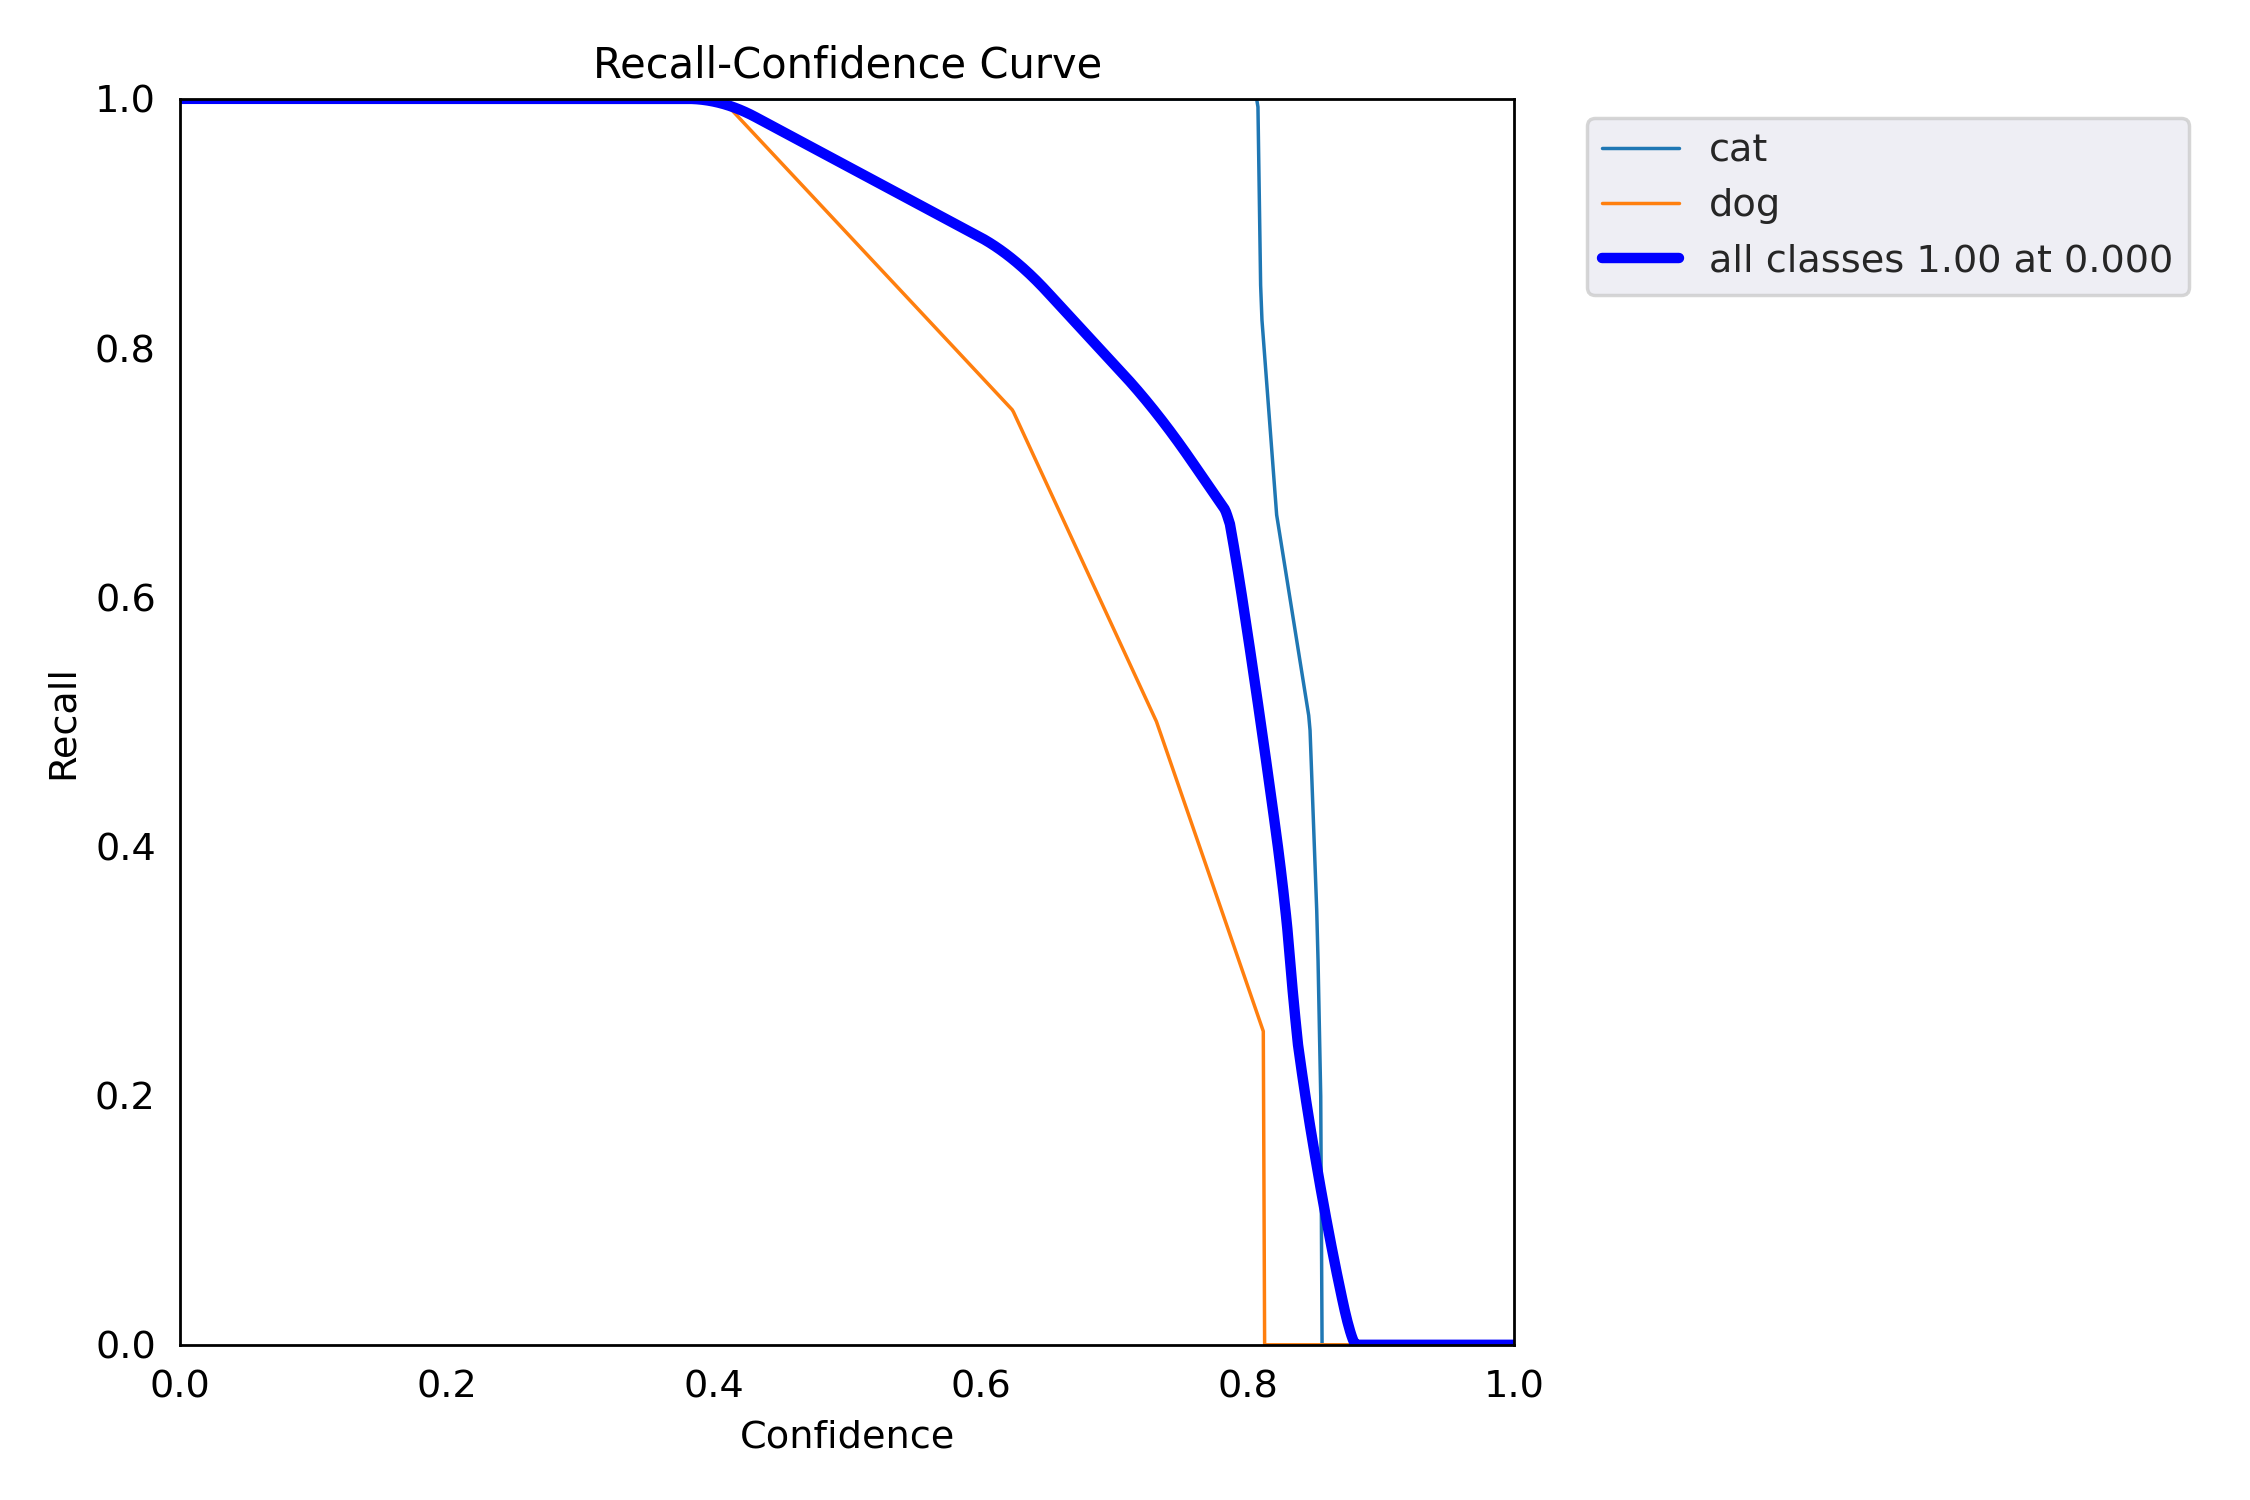

In [9]:
Image(filename='runs/val/exp/P_curve.png', width=600)
Image(filename='runs/val/exp/R_curve.png', width=600)


In [10]:
!cp -r runs/val/exp /content/drive/MyDrive/yolo_val_results/


In [11]:
!python train.py --img 640 --batch 16 --epochs 50 --data $dataset_path/data.yaml --weights yolov5s.pt --cache --project runs/train --name exp --exist-ok


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-02-16 02:20:03.545131: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739672403.579675    8907 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739672403.590701    8907 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/catdogdataset/dat